# **UNSUPERVISED LEARNING: GYM DATA**

**Link for dataset, presentation**

https://drive.google.com/drive/folders/1JBaHyGybVo8UOiCiKG8W50C4_AL32tCc?usp=share_link

### **Libraries**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

### **Import Data**

In [11]:
gym = pd.read_csv("/Users/sittipornkongsuchko/Downloads/gym_members_exercise_tracking.csv")

### **Data Preprocessing**

In [12]:
# Check for nulls
gym.info()
gym.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


There is no missing value, All feature have 973 rows, There are 2 categorical features and 13 numerical features

In [13]:
# Check for NA
print(gym.isna().any())

Age                              False
Gender                           False
Weight (kg)                      False
Height (m)                       False
Max_BPM                          False
Avg_BPM                          False
Resting_BPM                      False
Session_Duration (hours)         False
Calories_Burned                  False
Workout_Type                     False
Fat_Percentage                   False
Water_Intake (liters)            False
Workout_Frequency (days/week)    False
Experience_Level                 False
BMI                              False
dtype: bool


In [14]:
# Check for duplicates
print( "\n duplicate : " +  str(gym.duplicated().sum()))


 duplicate : 0


In [15]:
# For clustering, remove Calories_Burned column (Target)
gym.drop(columns = ['Calories_Burned'], inplace = True)
gym.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,Strength,29.2,2.8,3,1,14.39


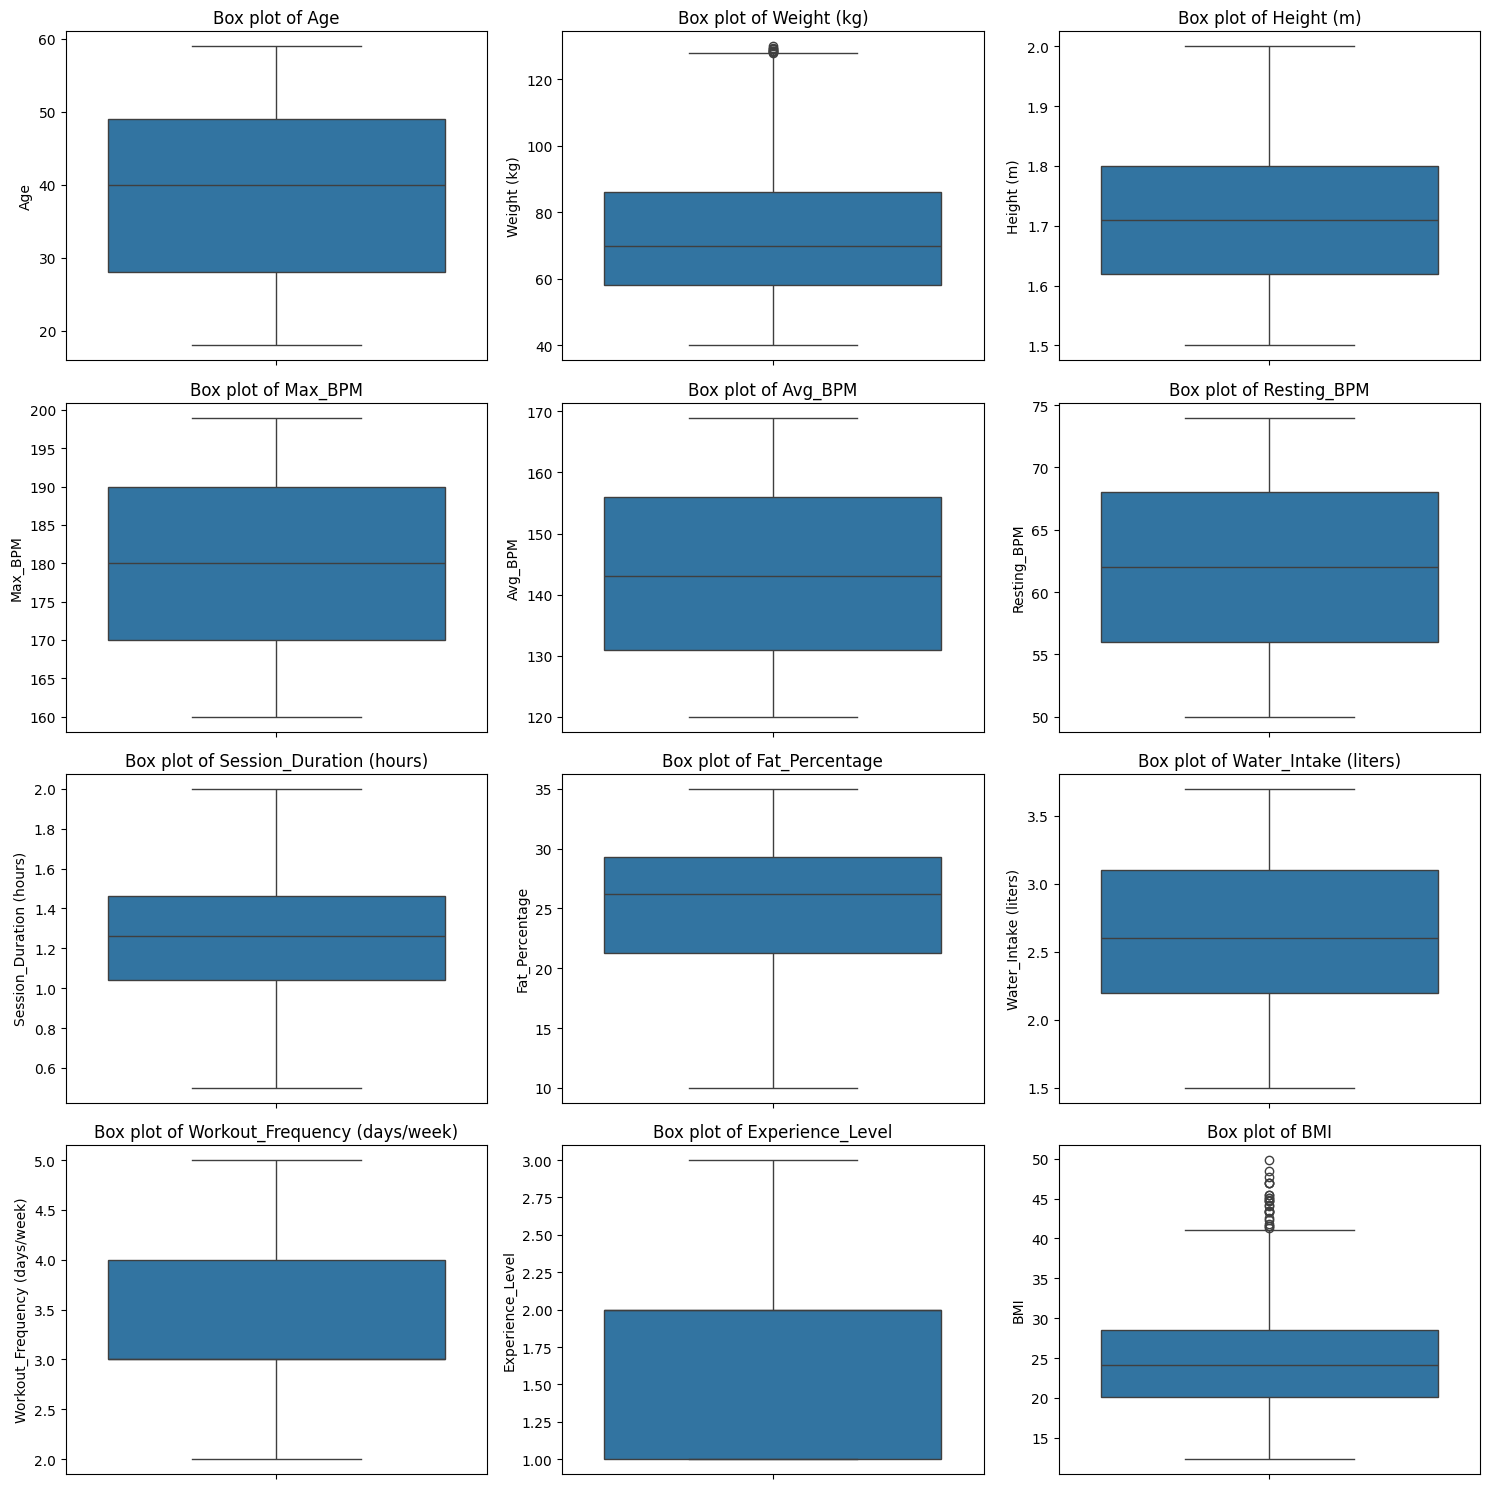

In [16]:
# Check outlier
# Create a box plot : check outlier without seperating gender

plt.figure(figsize=(15, 15))
# Loop through all columns of dtype 'float64', 'int64' to create box plots
for i, col in enumerate(gym.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=col, data=gym)
    plt.title(f'Box plot of {col}')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

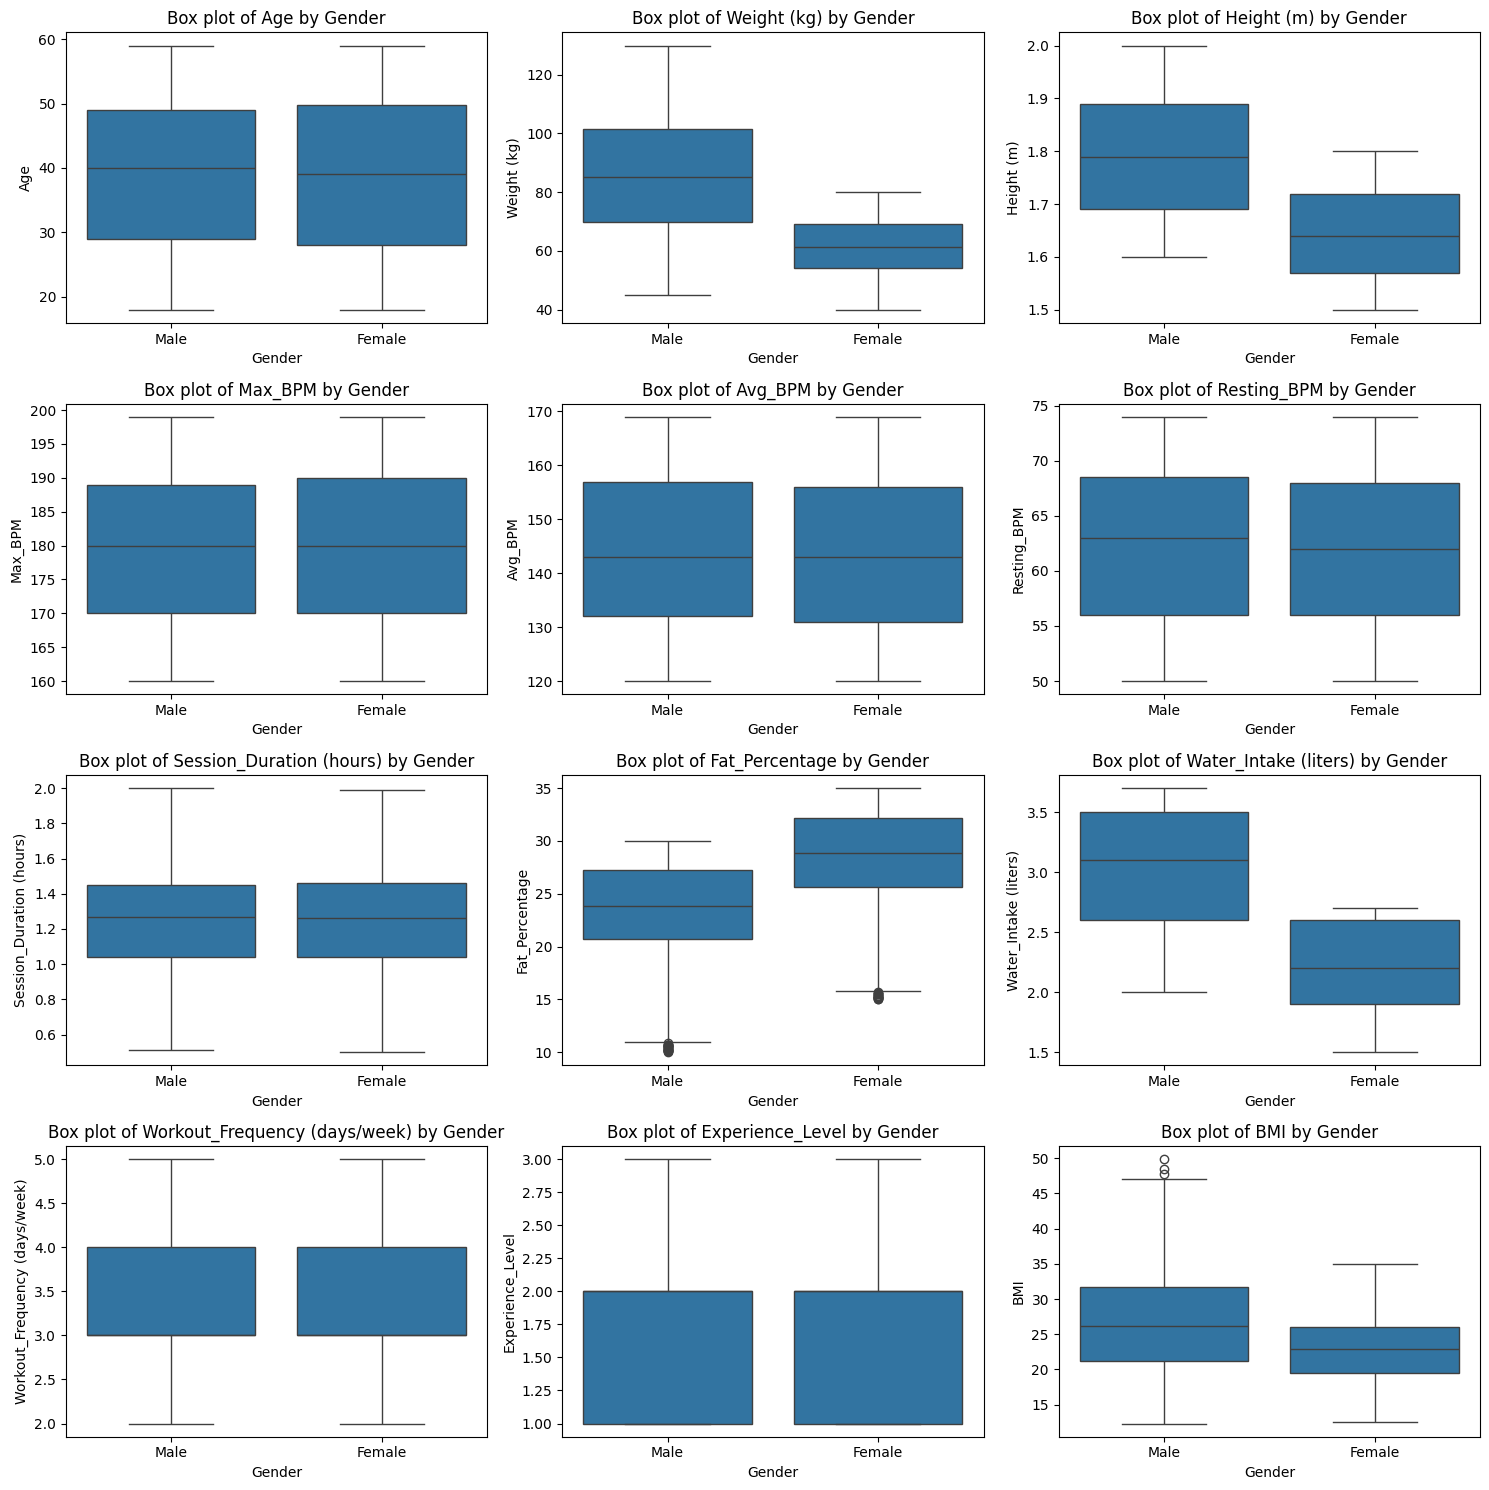

In [9]:
#Create a box plot : check outlier by seperating gender
#Loop through all columns of dtype 'float64', 'int64' to create box plots with gender grouping
plt.figure(figsize=(15, 15))
for i, col in enumerate(gym.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='Gender', y=col, data=gym)
    plt.title(f'Box plot of {col} by Gender')
plt.tight_layout()
plt.show()

In [17]:
# Remove outliers
# Function to remove outliers based on IQR for each gender group
def remove_outliers_by_gender(df):
    # Create an empty list to collect DataFrames
    cleaned_groups = []

    # Loop through each unique gender
    for gender in df['Gender'].unique():
        group = df[df['Gender'] == gender]

        # Loop through each column of dtype 'float64', 'int64'
        for col in group.select_dtypes(include=['float64', 'int64']).columns:
            Q1 = group[col].quantile(0.25)
            Q3 = group[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            group = group[(group[col] >= lower_bound) & (group[col] <= upper_bound)]


        cleaned_groups.append(group)

    # Concatenate all cleaned groups back into a single DataFrame
    cleaned_df = pd.concat(cleaned_groups, ignore_index=True)
    return cleaned_df

# Remove outliers from the gym dataset based on gender
gym_cleaned = remove_outliers_by_gender(gym)

# Check the shape of the cleaned DataFrame
print(f'Original dataframe shape: {gym.shape}')
print(f'Cleaned dataframe shape: {gym_cleaned.shape}')

Original dataframe shape: (973, 14)
Cleaned dataframe shape: (936, 14)


### **Exploratory Data Analysis**

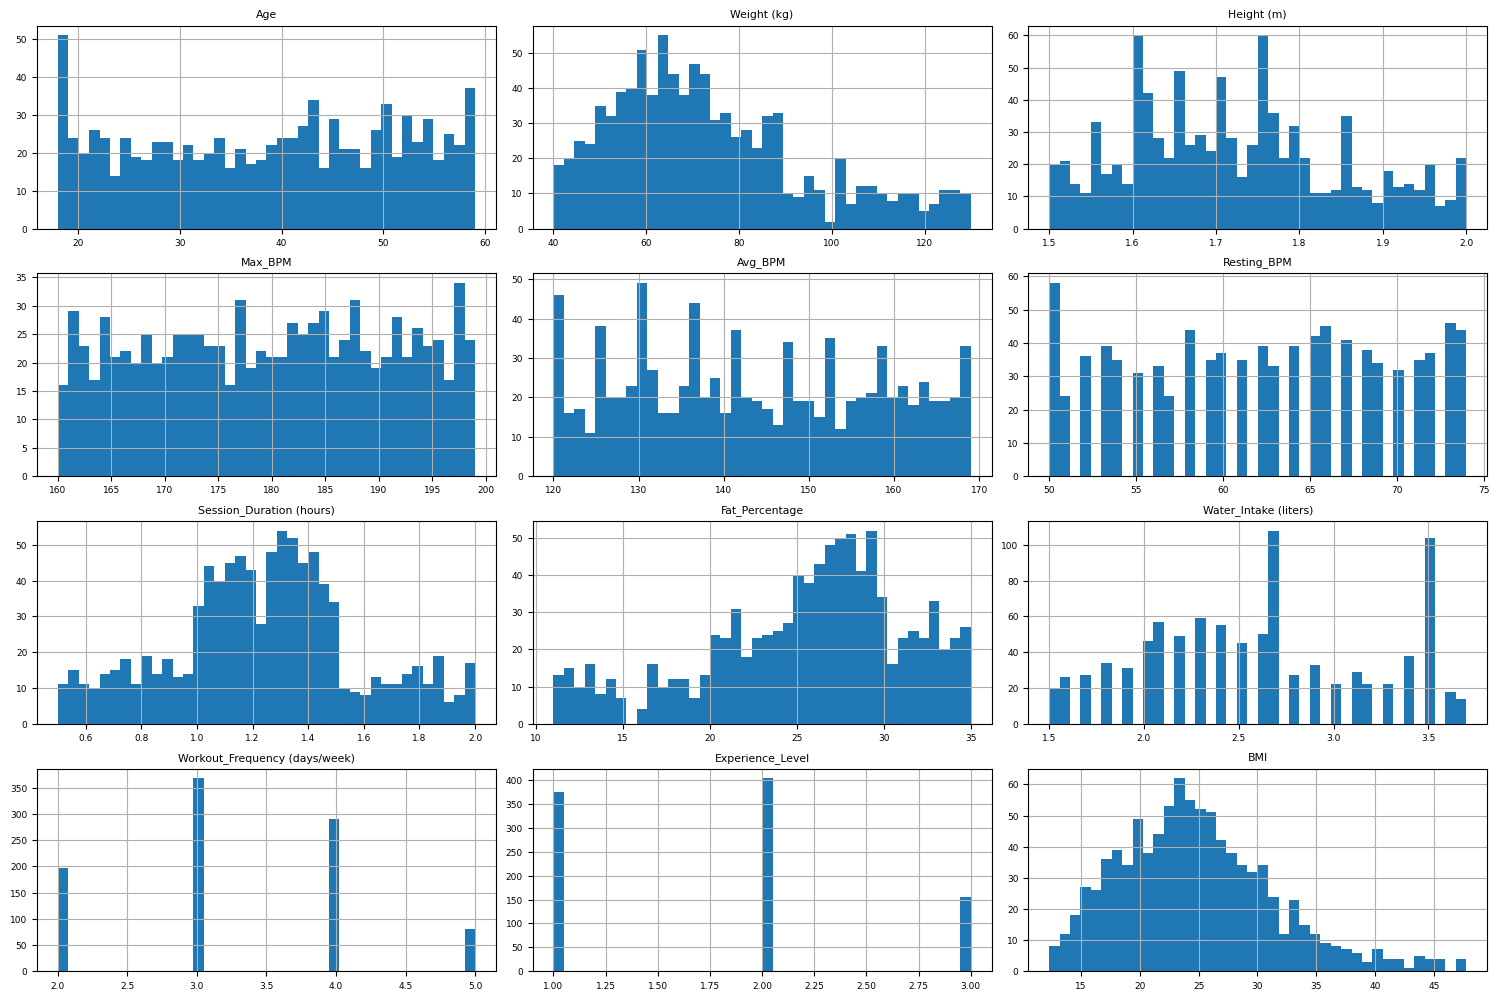

In [18]:
# Histogram for numerical features
plt.rcParams.update({'font.size': 6.5})
gym_cleaned.hist(bins=40, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [19]:
# Check column of data type 'object'
print(f"The unique values in 'Gender' are: {gym_cleaned['Gender'].unique()}.")
print(f"The unique values in 'Workout_Type' are: {gym_cleaned['Workout_Type'].unique()}.")

The unique values in 'Gender' are: ['Male' 'Female'].
The unique values in 'Workout_Type' are: ['Yoga' 'Strength' 'Cardio' 'HIIT'].


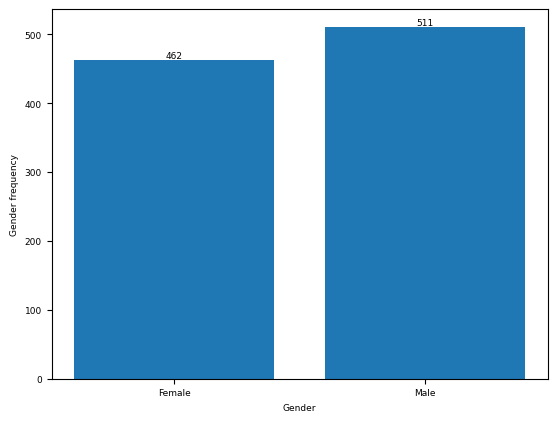

In [20]:
# Plot Gender
Gender_counts = gym['Gender'].value_counts().sort_index()

plt.bar(x=Gender_counts.index, height=Gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Gender frequency')
for index, value in enumerate(Gender_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()


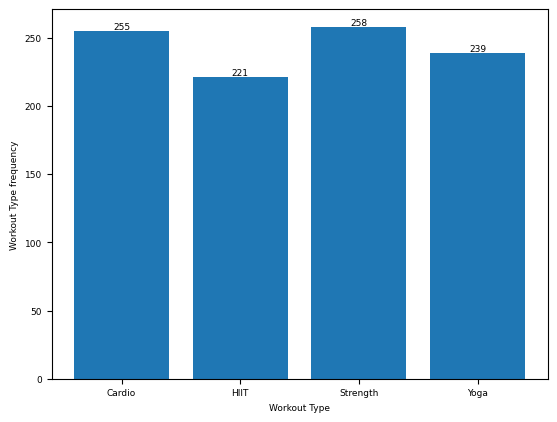

In [21]:
# Plot Workout_Type
Workout_Type_counts = gym['Workout_Type'].value_counts().sort_index()

plt.bar(x=Workout_Type_counts.index, height=Workout_Type_counts.values)
plt.xlabel('Workout Type')
plt.ylabel('Workout Type frequency')
for index, value in enumerate(Workout_Type_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

In [22]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform 'Gender' and 'Workout_Type' columns together
encoded_data = encoder.fit_transform(gym_cleaned[['Gender', 'Workout_Type']])

# Get feature names from the encoder (combined for both columns)
feature_names = encoder.get_feature_names_out(['Gender', 'Workout_Type'])

# Convert the encoded arrays to DataFrames and add column names
encoded_df = pd.DataFrame(encoded_data, columns=feature_names)

# Concatenate the encoded DataFrame with the original 'gym_cleaned' DataFrame
gym_encoded = pd.concat([gym_cleaned, encoded_df], axis=1)

# drop the original 'Gender' and 'Workout_Type' columns
gym_encoded = gym_encoded.drop(columns=['Gender', 'Workout_Type'])

# Display the final DataFrame
gym_encoded.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Female,Gender_Male,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,56,88.3,1.71,180,157,60,1.69,12.6,3.5,4,3,30.20,0.0,1.0,0.0,0.0,0.0,1.0
1,25,53.2,1.70,190,164,56,0.59,28.8,2.1,3,1,18.41,0.0,1.0,0.0,0.0,1.0,0.0
2,38,46.1,1.79,188,158,68,0.64,29.2,2.8,3,1,14.39,0.0,1.0,0.0,0.0,1.0,0.0
3,36,70.3,1.72,174,169,73,1.49,21.3,2.3,3,2,23.76,0.0,1.0,1.0,0.0,0.0,0.0
4,28,121.7,1.94,185,127,52,1.03,28.9,2.6,4,2,32.34,0.0,1.0,0.0,0.0,1.0,0.0


In [23]:
# Scaling data to have the same weight
ss = StandardScaler()
gym_scaled = ss.fit_transform(gym_encoded)

# Turn gym back into a dataframe
gym_scaled = pd.DataFrame(gym_scaled, columns=gym_encoded.columns)

# Check data
gym_scaled.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Female,Gender_Male,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,1.415049,0.684121,-0.094989,0.007610,0.930710,-0.299313,1.347199,-2.190301,1.497826,0.817420,1.724121,0.800800,-0.956091,0.956091,-0.605329,-0.534522,-0.597094,1.746983
1,-1.128252,-0.962051,-0.173810,0.876225,1.418472,-0.843570,-1.936598,0.571288,-0.846877,-0.306082,-1.067881,-0.970991,-0.956091,0.956091,-0.605329,-0.534522,1.674777,-0.572416
2,-0.061707,-1.295037,0.535577,0.702502,1.000390,0.789203,-1.787335,0.639475,0.325474,-0.306082,-1.067881,-1.575113,-0.956091,0.956091,-0.605329,-0.534522,1.674777,-0.572416
3,-0.225791,-0.160070,-0.016168,-0.513560,1.766874,1.469525,0.750145,-0.707226,-0.511920,-0.306082,0.328120,-0.166998,-0.956091,0.956091,1.651994,-0.534522,-0.597094,-0.572416
4,-0.882126,2.250565,1.717890,0.441917,-1.159702,-1.387828,-0.623079,0.588335,-0.009483,0.817420,0.328120,1.122397,-0.956091,0.956091,-0.605329,-0.534522,1.674777,-0.572416


<Axes: >

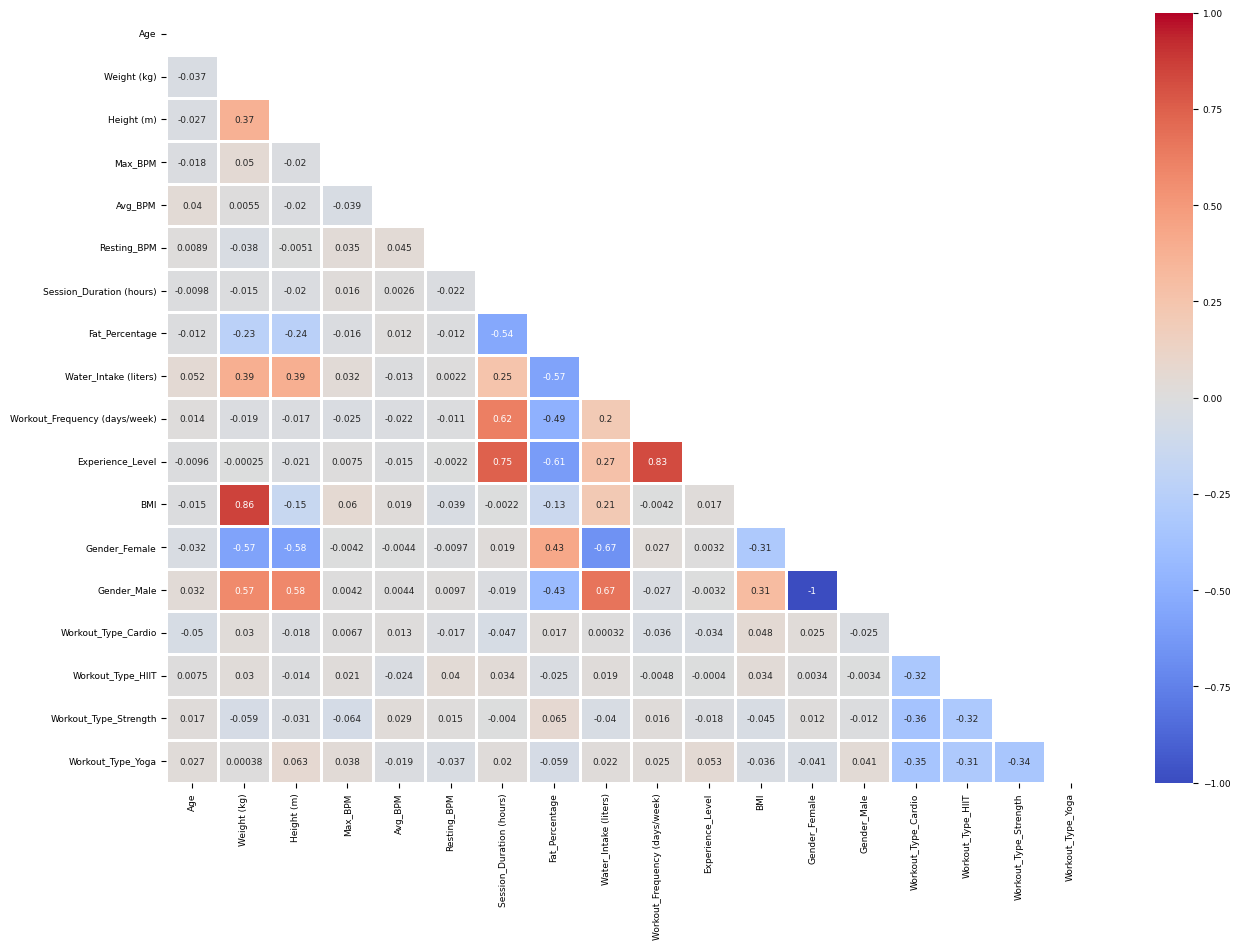

In [24]:
# Correlation matrix
dcorr = gym_scaled.corr()

mask = np.zeros_like(dcorr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(dcorr, cmap = 'coolwarm',
            vmin = -1, vmax = 1, center = 0, linewidths = 1,mask = mask, annot = True, ax = ax)

### **Principal Component Analysis**

In [25]:
# PCA
pca = PCA(n_components=9)
pca.fit_transform(gym_scaled)

print(f'explained_variance (n_components={pca.n_components}) = {pca.explained_variance_}\n')
print(f'explained_variance ratio (n_components={pca.n_components}) = {pca.explained_variance_ratio_}\n')
print(f'Cumulative explained_variance_ratio = {np.sum(pca.explained_variance_ratio_)}')

explained_variance (n_components=9) = [3.97982466 2.80409063 1.52330719 1.36841139 1.33239063 1.27863497
 1.06353002 1.02678435 0.97068959]

explained_variance ratio (n_components=9) = [0.22086515 0.15561638 0.08453776 0.07594163 0.07394262 0.07095938
 0.05902188 0.05698263 0.05386959]

Cumulative explained_variance_ratio = 0.8517370206676536


In [26]:
# Transform data
gym_pca = pca.transform(gym_scaled)
gym_pca = pd.DataFrame(gym_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
gym_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,3.411528,1.805430,-0.277787,-0.906341,-0.486382,1.537272,-1.611998,0.573950,0.469856
1,-1.007885,-1.790998,-1.464263,1.414474,0.568120,0.253854,0.377032,-0.563281,-0.748031
2,-0.581731,-1.677601,-2.554747,1.409713,0.605332,-0.548237,-0.546322,-1.270697,-0.062197
3,0.861013,0.055284,0.331283,-0.129415,1.716754,-1.039726,-1.924127,-0.495242,-1.238420
4,2.113256,-1.307407,0.309854,1.557687,0.143983,1.238821,2.399077,0.052042,0.145436


### **K-Means Clustering**

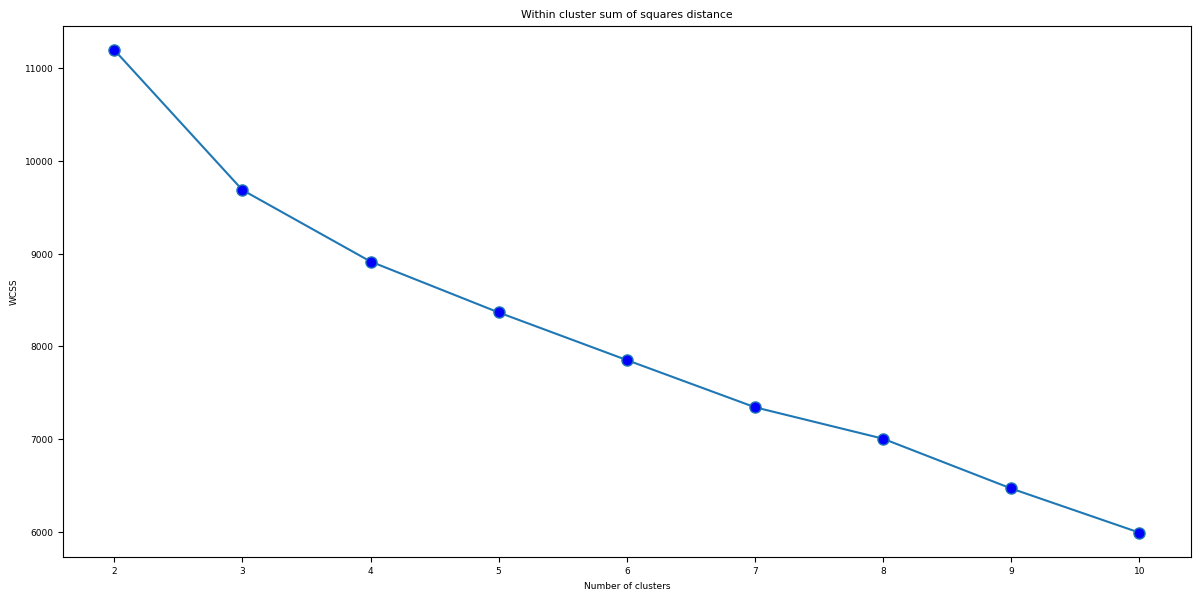

In [27]:
# Find the best K using K Elbow method

n_start = 2
n_end = 10

wcss = []
for i in range(n_start, n_end + 1):
    kmeans = KMeans(n_clusters = i, random_state=5, n_init=10) # 10 initializations for each k
    kmeans.fit(gym_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(range(n_start, n_end + 1), wcss,marker='o',
         markerfacecolor='blue', markersize=8)

plt.title('Within cluster sum of squares distance')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.tight_layout()
plt.show()

In [28]:
# Find the best K using Sihouette plot
def silhouette_plot(X_data, range_n_clusters):
    # Convert X_data to a NumPy array if it's a DataFrame
    if isinstance(X_data, pd.DataFrame):
        X_data = X_data.to_numpy()

    for n in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(14, 4)
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X_data) + (n + 1) * 10])

        kmeans_model = KMeans(n_clusters=n, random_state=0)
        kmeans = kmeans_model.fit_predict(X_data)
        silhouette_avg = silhouette_score(X_data, kmeans)
        print("For n_clusters =", n, "The average silhouette_score is:", silhouette_avg)
        sample_silhouette_values = silhouette_samples(X_data, kmeans)

        y_lower = 10
        for i in range(n):
            ith_cluster_silhouette_values = sample_silhouette_values[kmeans == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / n)
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # Plot the clusters in terms of PC1 and PC2 (first two principal components)
        ax2.set_title("Cluster visualization using PC1 and PC2")
        ax2.set_xlabel("PC1")
        ax2.set_ylabel("PC2")

        # Scatter plot of the first two principal components, color-coded by cluster
        colors = cm.nipy_spectral(kmeans.astype(float) / len(kmeans_model.cluster_centers_))
        ax2.scatter(X_data[:, 0], X_data[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

        # Plot the cluster centers
        centers = kmeans_model.cluster_centers_
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        plt.suptitle(f"Silhouette analysis for KMeans clustering on sample data with n_clusters = {n}", fontsize=14, fontweight='bold')
        plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average silhouette_score is: 0.20784912144607276


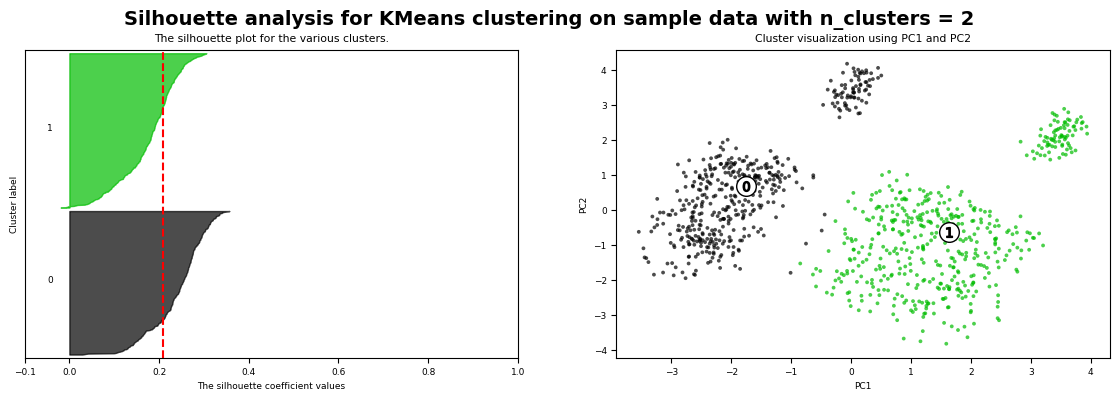

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 The average silhouette_score is: 0.21310764350679673


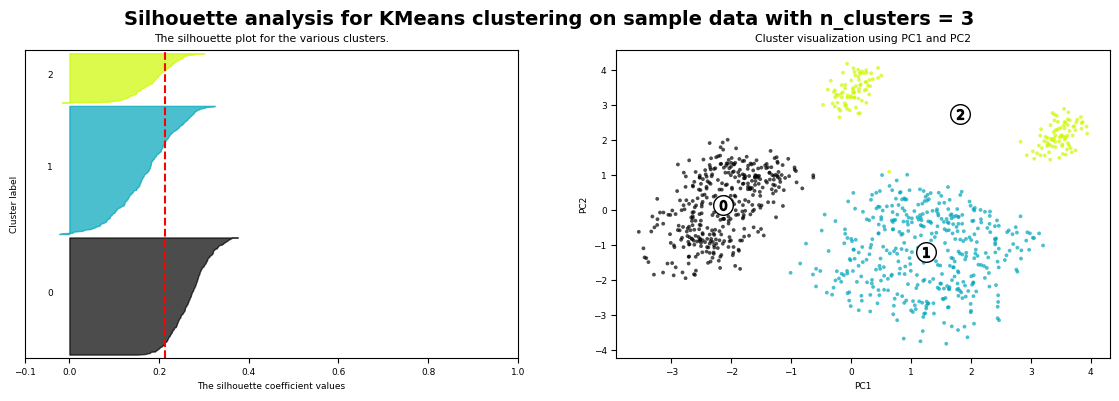

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4 The average silhouette_score is: 0.18326895277205707


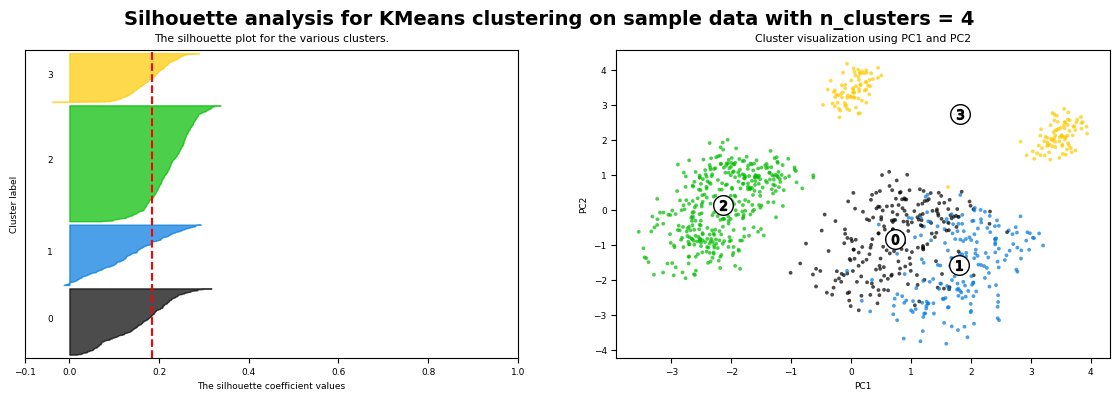

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5 The average silhouette_score is: 0.1854405447125113


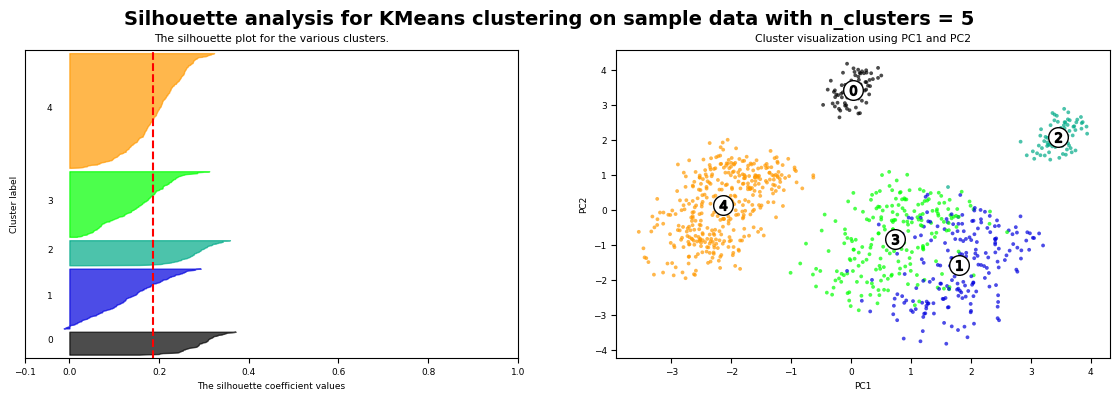

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6 The average silhouette_score is: 0.16882607407970676


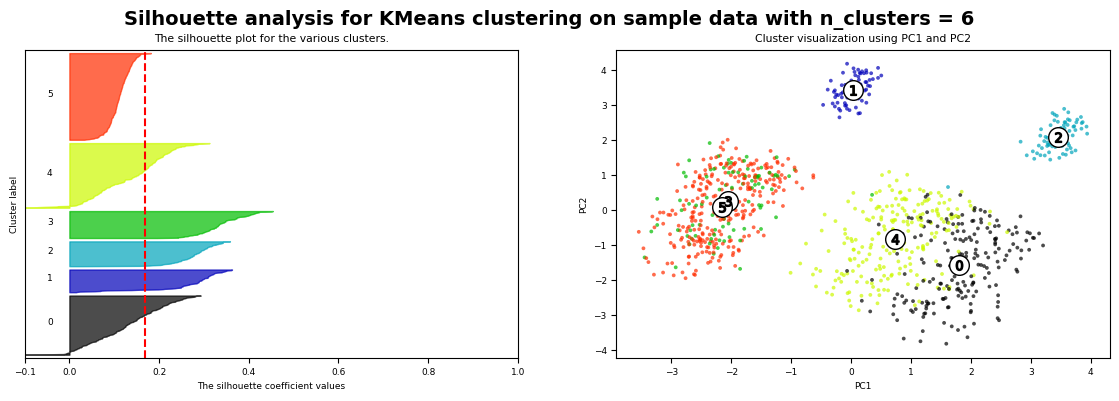

In [29]:
range_n_clusters = [2,3,4,5,6]
silhouette_plot(gym_pca,range_n_clusters)

In [30]:
# Perform K-Means clustering with K = 4
model = KMeans(n_clusters = 4, random_state = 5)
model.fit(gym_pca)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=5)

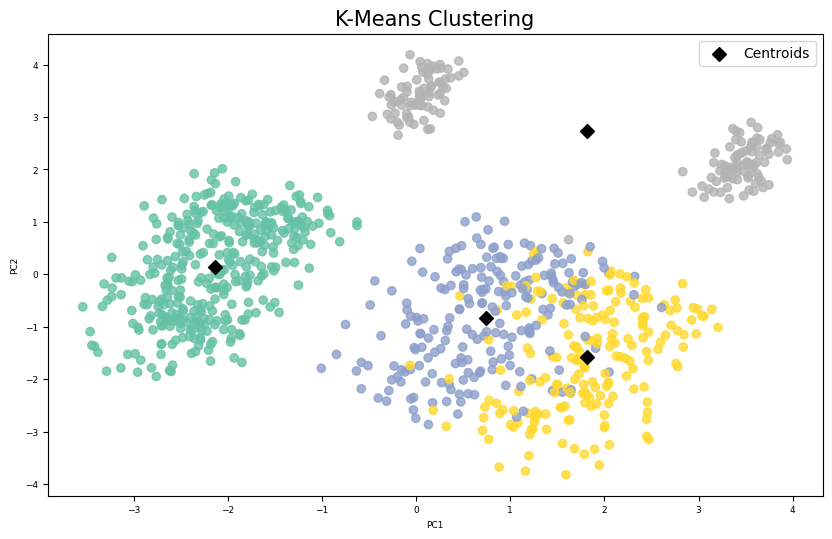

In [31]:
# Plot clusters
plt.figure(figsize=(10, 6))
plt.scatter(gym_pca['PC1'], gym_pca['PC2'], c=model.labels_, alpha=0.8, cmap='Set2')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
            color='black', marker='D', s=50,label='Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering', fontsize=15)
plt.legend(fontsize=10)
plt.show()

In [32]:
# New dataframe of gym_cleaned with clusters
gym_clustered = gym_cleaned.copy()
gym_clustered['cluster'] = model.labels_
gym_clustered.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,cluster
0,56,Male,88.3,1.71,180,157,60,1.69,Yoga,12.6,3.5,4,3,30.20,3
1,25,Male,53.2,1.70,190,164,56,0.59,Strength,28.8,2.1,3,1,18.41,1
2,38,Male,46.1,1.79,188,158,68,0.64,Strength,29.2,2.8,3,1,14.39,1
3,36,Male,70.3,1.72,174,169,73,1.49,Cardio,21.3,2.3,3,2,23.76,1
4,28,Male,121.7,1.94,185,127,52,1.03,Strength,28.9,2.6,4,2,32.34,2


In [33]:
# New dataframe of gym_scaled with clusters
gym_scaled_clustered = gym_scaled.copy()
gym_scaled_clustered['cluster'] = model.labels_
gym_scaled_clustered.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Female,Gender_Male,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga,cluster
0,1.415049,0.684121,-0.094989,0.007610,0.930710,-0.299313,1.347199,-2.190301,1.497826,0.817420,1.724121,0.800800,-0.956091,0.956091,-0.605329,-0.534522,-0.597094,1.746983,3
1,-1.128252,-0.962051,-0.173810,0.876225,1.418472,-0.843570,-1.936598,0.571288,-0.846877,-0.306082,-1.067881,-0.970991,-0.956091,0.956091,-0.605329,-0.534522,1.674777,-0.572416,1
2,-0.061707,-1.295037,0.535577,0.702502,1.000390,0.789203,-1.787335,0.639475,0.325474,-0.306082,-1.067881,-1.575113,-0.956091,0.956091,-0.605329,-0.534522,1.674777,-0.572416,1
3,-0.225791,-0.160070,-0.016168,-0.513560,1.766874,1.469525,0.750145,-0.707226,-0.511920,-0.306082,0.328120,-0.166998,-0.956091,0.956091,1.651994,-0.534522,-0.597094,-0.572416,1
4,-0.882126,2.250565,1.717890,0.441917,-1.159702,-1.387828,-0.623079,0.588335,-0.009483,0.817420,0.328120,1.122397,-0.956091,0.956091,-0.605329,-0.534522,1.674777,-0.572416,2


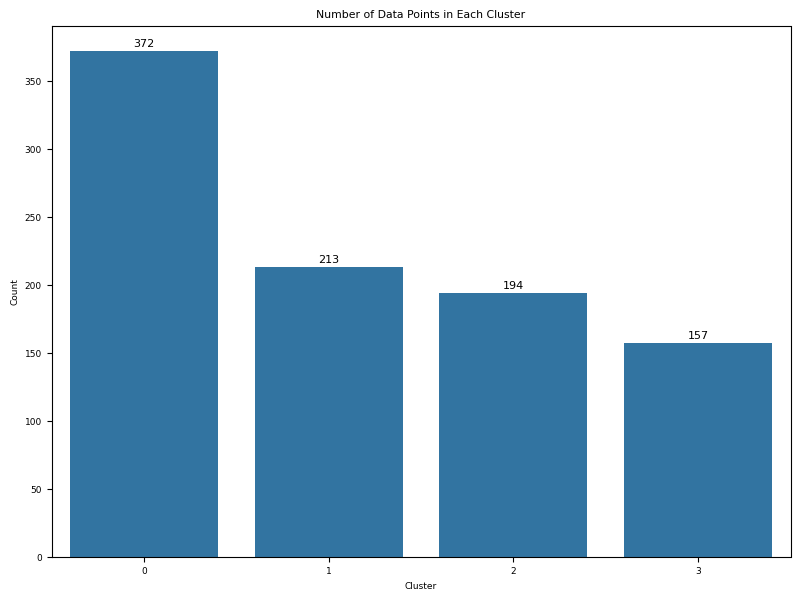

In [34]:
# Count the number of data points in each cluster
cluster_counts = gym_clustered['cluster'].value_counts().sort_index()

# Optional: Visualize the counts as a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
for i, count in enumerate(cluster_counts):
    ax.text(i, count + 2, str(count), ha='center', va='bottom', fontsize=8, color='black')

plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Number of Data Points in Each Cluster')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### **Customer Segmentation**

In [35]:
gym_scaled.columns

Index(['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Gender_Female', 'Gender_Male', 'Workout_Type_Cardio',
       'Workout_Type_HIIT', 'Workout_Type_Strength', 'Workout_Type_Yoga'],
      dtype='object')

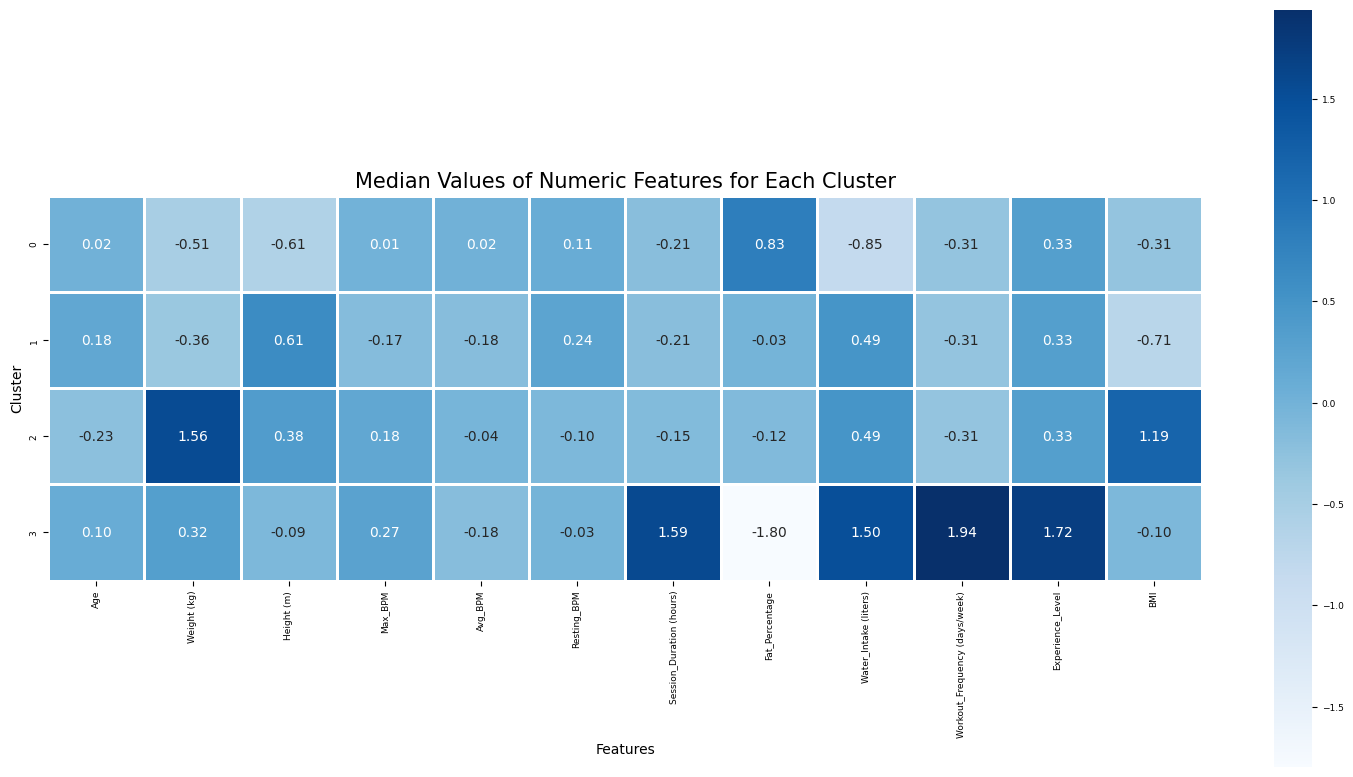

In [36]:
# Numerical columns in gym_scaled
numeric_cluster_cols = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
                'Resting_BPM', 'Session_Duration (hours)', 'Fat_Percentage',
                'Water_Intake (liters)', 'Workout_Frequency (days/week)',
                'Experience_Level', 'BMI', 'cluster']

# Group by 'cluster' and compute median
cluster_medians = gym_scaled_clustered[numeric_cluster_cols].groupby('cluster').median()

# Create the heatmap
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(cluster_medians, annot=True, square=True, fmt=".2f",
            cmap='Blues', linewidths=1, annot_kws={"size": 10})
# Set titles and labels
plt.title("Median Values of Numeric Features for Each Cluster", fontsize=15)
plt.xlabel("Features", fontsize=10)
plt.ylabel("Cluster", fontsize=10)
plt.tight_layout()
plt.show()

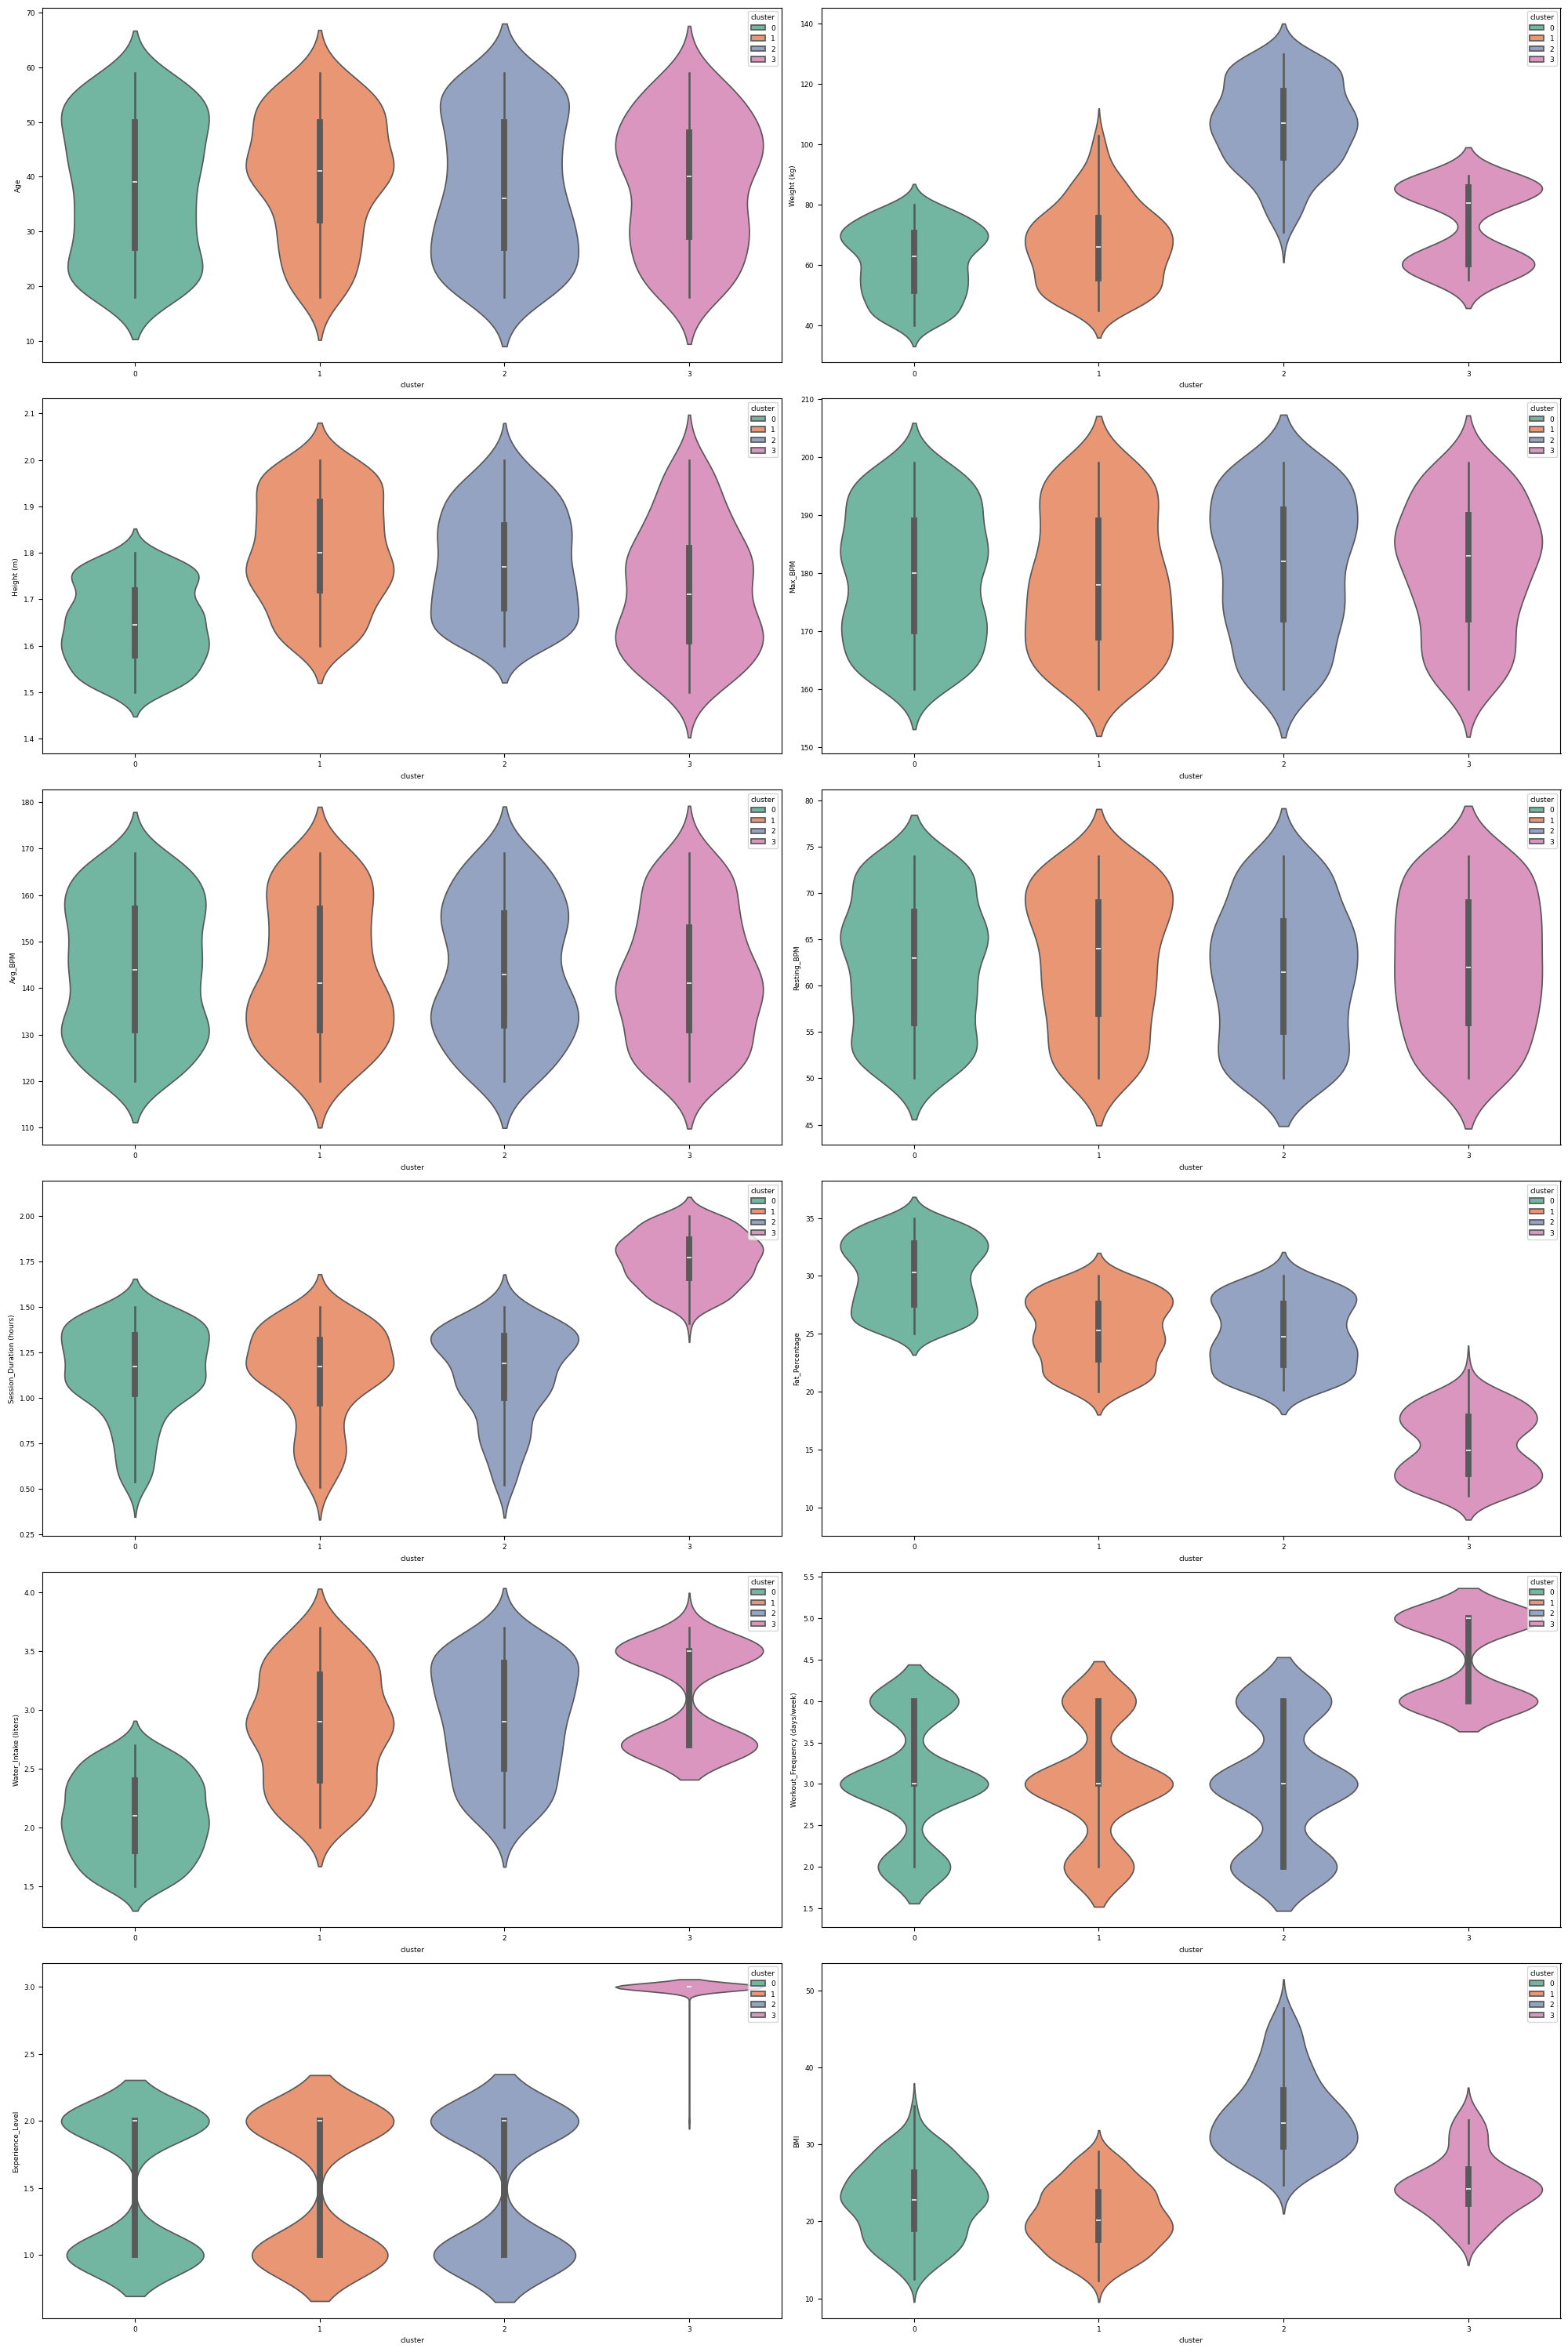

In [37]:
# Numerical columns in gym_clustered
numeric_cols = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
                'Resting_BPM', 'Session_Duration (hours)', 'Fat_Percentage',
                'Water_Intake (liters)', 'Workout_Frequency (days/week)',
                'Experience_Level', 'BMI']

# Create subplots
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(20, 30))
ax=ax.ravel()

# Plot violin plots for each numeric column
for i, col in enumerate(numeric_cols):
  sns.violinplot(x='cluster', y=col, data=gym_clustered, ax=ax[i], hue='cluster', palette='Set2')

plt.tight_layout()
plt.show()

เลือก feature: weight(kg), height(m), session_duration(hour), fat_percentage, water_intake, workout_frequency(days/week), experience_level, BMI มาแปรผล เพราะมีการแบ่งแยกในแต่ละ cluster ได้ดี

ส่วน feature: age, max_bpm, avg_bpm, resting_bpm, จะไม่นำมาแปรผล เพราะมีลักษณะการกระจายคล้ายกันทุก cluster

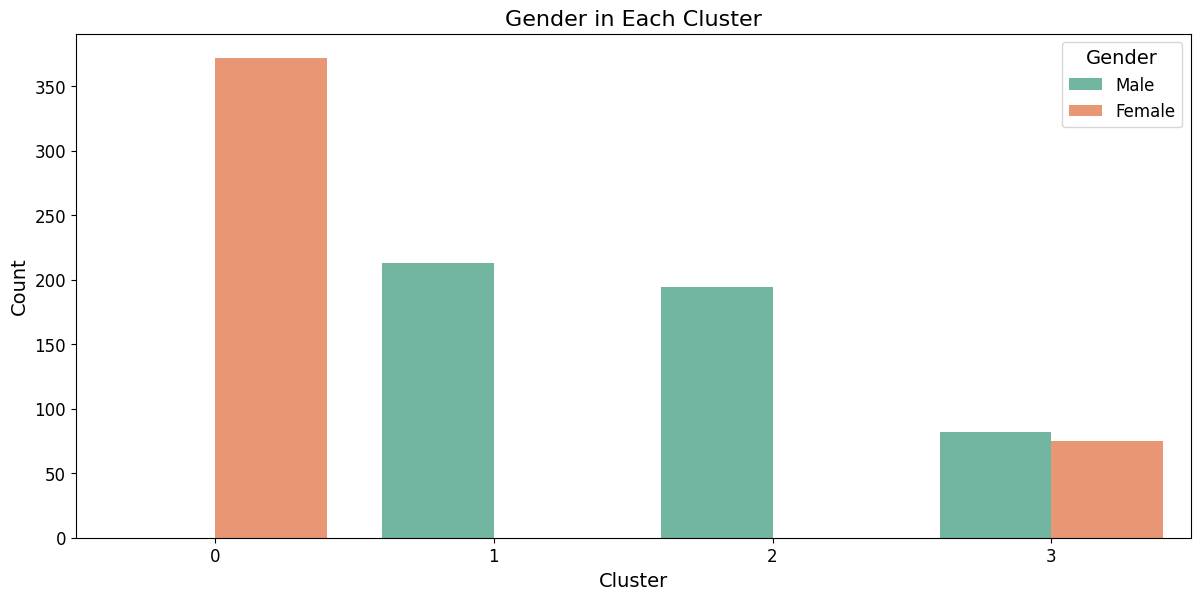

In [38]:
# Group by 'cluster' and 'Gender', then count occurrences
gender_cluster_counts = gym_clustered.groupby(['cluster', 'Gender']).size().reset_index(name='Count')

# Create all possible combinations of clusters and genders
clusters = gym_clustered['cluster'].unique()
genders = gym_clustered['Gender'].unique()
all_combinations = pd.MultiIndex.from_product([clusters, genders], names=['cluster', 'Gender'])

# Reindex to include missing combinations and fill missing counts with 0
gender_cluster_counts = (
    gender_cluster_counts.set_index(['cluster', 'Gender'])
    .reindex(all_combinations, fill_value=0)
    .reset_index()
)

# Plot as a grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=gender_cluster_counts, x='cluster', y='Count', hue='Gender', palette='Set2')

# Customize the plot
plt.title('Gender in Each Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Gender', fontsize=12, title_fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

feature Gender สามารถแบ่ง cluster ได้ดี สามารถนำมาแปรผลได้ cluster0 เพศชาย, cluster1 เพศหญิง, cluster2 เพศหญิง, cluster3 เพศชาย

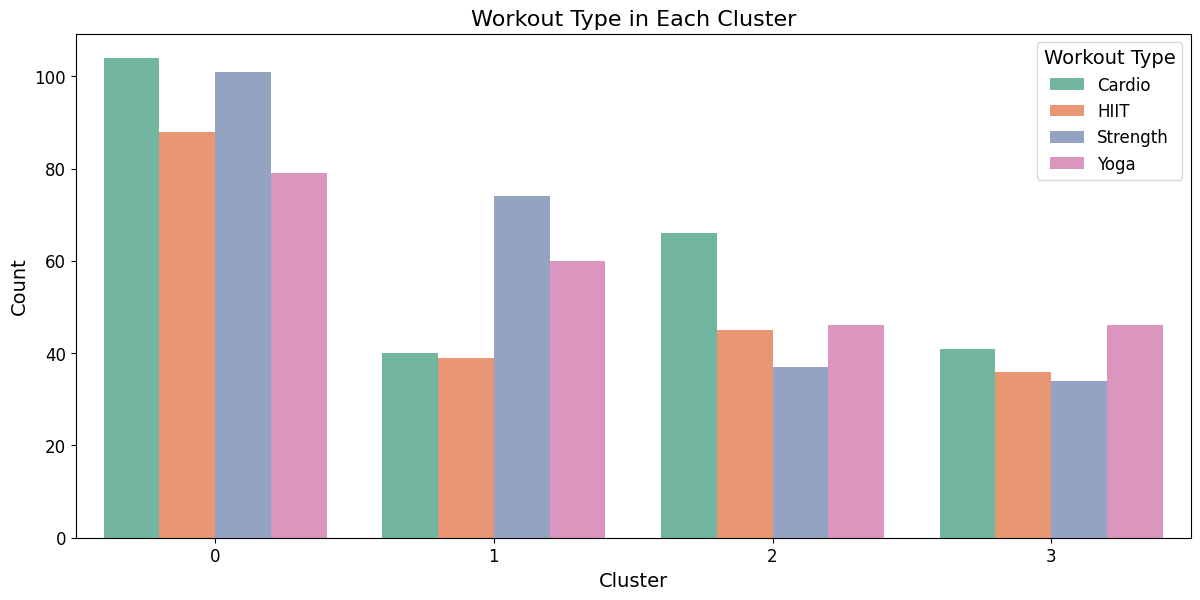

In [39]:
# Calculate counts of Workout_Type in each cluster
Workout_Type_cluster_counts = gym_clustered.groupby(['cluster', 'Workout_Type']).size().reset_index(name='Count')

# Plot the counts as a grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=Workout_Type_cluster_counts, x='cluster', y='Count', hue='Workout_Type', palette='Set2')
plt.title('Workout Type in Each Cluster', fontsize=16)
plt.legend(title='Workout Type', fontsize=12, title_fontsize=14)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

feature Workout_type จะไม่นำมาแปรผล เพราะในแต่ละ cluster มีการกระจายตัวของข้อมูลไม่ชัดเจน

จากข้อเสนอแนะของอาจารย์ ดังนี้
1. ไม่ต้อง remove outliers สำหรับการทำ unsupervised learning ซึ่งเมื่อทำ K-Means clustering
แล้วผลที่ได้มีลักษณะไม่แตกต่างจากการ remove outliers

2. เลือกจำนวน clusters = 3 แล้วทำ K-Means clustering ผลที่ได้ของข้อมูลใน cluster ที่ 2 จะเหมือนกับการรวมข้อมูลของ cluster ที่ 2 และ 3 ในการทำ clustering ที่จำนวน clusters = 4